<h3>Note: There is no need to run the notebook to check the results.

In [1]:
import seaborn as sns
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
%matplotlib inline
from numpy.linalg import inv
from scipy import linalg as LA
from numpy import array

1. Here, We try to compare the performance in clustering between original data and reduced data (from pca). The reduced data is read from the file written by ftest.cu on which we applied the pca and reduced the dimension to 14 from 29.
2. Three types of clustering used- K-Means, GMM, Agglomerative/Hierarchical
3. The performance metric used is average cluster purity. Number of clusters taken = 5
4. Refer the end of this notebook to look at the graphical and numerical representation of results.
5. Files used are intrusion.csv and reduced.csv

<h2>Reading original Data</h2>

In [2]:
df = pd.read_csv('intrusion.csv')

In [3]:
df.columns

Index(['duration', 'service', 'src_bytes', 'dst_bytes', 'hot',
       'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations', 'num_access_files', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [4]:
X=df[['duration', 'service', 'src_bytes', 'dst_bytes', 'hot',
       'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations', 'num_access_files', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']]
Y= df['xAttack']

<h2>Preprocessing</h2>
<br>Normalizing the original data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)
# X_test = sc.transform(X_test)

In [6]:
proj_data = X

In [7]:
proj_data

array([[-0.11453823, -0.42593636, -0.01001262, ..., -0.53533169,
        -0.38607684, -0.37498211],
       [-0.11453823,  0.362291  , -0.01009237, ..., -0.62514571,
         2.87824009,  2.77113829],
       [-0.11453823, -0.42593636, -0.01002337, ..., -0.62514571,
        -0.38607684, -0.37498211],
       ...,
       [ 0.8942439 ,  1.7568471 , -0.00917297, ..., -0.62514571,
        -0.38607684, -0.37498211],
       [-0.11453823, -1.0322651 , -0.01008907, ..., -0.62514571,
        -0.38607684, -0.37498211],
       [-0.11453823,  1.08988549, -0.01009237, ...,  1.62020478,
        -0.38607684, -0.37498211]])

In [8]:
dim = 29

<h2>K-Means Clustering on original data

In [9]:
centres=[]
for i in range(5):
    centres.append(proj_data[i])
centres

[array([-0.11453823, -0.42593636, -0.01001262, -0.03450679, -0.09095551,
        -0.02632191, -0.02193826, -0.02180142, -0.0279158 , -0.0440872 ,
        -0.60522895,  0.12721807, -0.63781221, -0.63167052, -0.37314059,
        -0.37395115,  0.77002424, -0.34905141, -0.06426044, -1.69021291,
         1.26287156,  1.06757184, -0.44108335, -0.2534255 ,  0.07102994,
        -0.63949951, -0.53533169, -0.38607684, -0.37498211]),
 array([-0.11453823,  0.362291  , -0.01009237, -0.03981905, -0.09095551,
        -0.02632191, -0.02193826, -0.02180142, -0.0279158 , -0.0440872 ,
         0.92817061, -0.36881581, -0.63781221, -0.63167052,  2.75848585,
         2.72311541, -1.48331444,  0.04132523, -0.37495767,  0.73294698,
        -1.03251227, -1.15954486, -0.06960921, -0.47972172, -0.28900583,
        -0.63949951, -0.62514571,  2.87824009,  2.77113829]),
 array([-0.11453823, -0.42593636, -0.01002337,  0.07731576, -0.09095551,
        -0.02632191, -0.02193826, -0.02180142, -0.0279158 , -0.0440872 ,


In [10]:
cluster = []
tempclus = [[],[],[],[],[]]
for i in range(len(proj_data)):
    dist=[]
    for j in range(5):
        d=0
        for k in range(dim):
            d = d + (proj_data[i][k]-centres[j][k])**2
        d=math.sqrt(d)
        dist.append(d)
    ind = dist.index(min(dist))
    tempclus[ind].append(proj_data[i])
    cluster.append(ind)
for a in range(5):
    size =len(tempclus[a])
    fnp = array(tempclus[a])
    centres[a] = fnp.sum(axis=0)/size

In [11]:
count = 0
while(1):
    count = count+1
    tempclus = [[],[],[],[],[]]
    flag=0
    for i in range(len(proj_data)):
        dist=[]
        for j in range(5):
            d=0
            for k in range(dim):
                d = d + (proj_data[i][k]-centres[j][k])**2
            d=math.sqrt(d)
            dist.append(d)
        ind = dist.index(min(dist))
        tempclus[ind].append(proj_data[i])
        if(cluster[i]!=ind):
            flag=1
            cluster[i] = ind
    for a in range(5):
        size =len(tempclus[a])
        fnp = array(tempclus[a])
        centres[a] = fnp.sum(axis=0)/size
    if(flag==0):
        break
print(count)

25


In [12]:
purity=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
print(cluster.count(0))
print(cluster.count(1))
print(cluster.count(2))
print(cluster.count(3))
print(cluster.count(4))
len(cluster)

1564
2954
9245
4341
6894


24998

In [13]:
y_ls = ['normal', 'dos', 'probe', 'r2l', 'u2r']

In [14]:
for i in range(len(cluster)):
    ind = cluster[i]
    ind2 = y_ls.index(Y[i])
    purity[ind][ind2] = purity[ind][ind2] + 1 

In [15]:
pur_kmean= []
avg_purity= 0
for i in range(5):
    for j in range(5):
        purity[i][j] = purity[i][j]/cluster.count(i)
    print("Purity for cluster"+str(i)+"------ "+str(max(purity[i])))
    pur_kmean.append(max(purity[i]))
    avg_purity = avg_purity + (max(purity[i]))*cluster.count(i)/len(cluster)
print("Average purity::   "+str(avg_purity))

Purity for cluster0------ 0.5236572890025576
Purity for cluster1------ 0.4617467840216655
Purity for cluster2------ 0.9727420227149811
Purity for cluster3------ 0.8306841741534209
Purity for cluster4------ 0.9865100087032201
Average purity::   0.8633890711256901


<h2>Gaussian Mixture Model Clusters on original data

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 5) 
gmm.fit(proj_data)
cluster = gmm.predict(proj_data)
cluster

array([1, 2, 2, ..., 1, 2, 0], dtype=int64)

In [17]:
len(cluster)

24998

In [18]:
cluster = np.array(cluster).tolist()

In [19]:
purity=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
print(cluster.count(0))
print(cluster.count(1))
print(cluster.count(2))
print(cluster.count(3))
print(cluster.count(4))
len(cluster)

6477
2840
12413
8
3260


24998

In [20]:
for i in range(len(cluster)):
    ind = cluster[i]
    ind2 = y_ls.index(Y[i])
    purity[ind][ind2] = purity[ind][ind2] + 1 

In [21]:
avg_purity = 0
pur_gmm = []
for i in range(5):
    for j in range(5):
        purity[i][j] = purity[i][j]/cluster.count(i)
    print("Purity for cluster"+str(i)+"------ "+str(max(purity[i])))
    pur_gmm.append(max(purity[i]))
    avg_purity = avg_purity + (max(purity[i]))*cluster.count(i)/len(cluster)
print("Average purity::   "+str(avg_purity))
purity

Purity for cluster0------ 1.0
Purity for cluster1------ 0.5397887323943662
Purity for cluster2------ 0.746958833481028
Purity for cluster3------ 1.0
Purity for cluster4------ 0.7825153374233129
Average purity::   0.7937034962797024


[[0.0, 1.0, 0.0, 0.0, 0.0],
 [0.5397887323943662,
  0.21725352112676055,
  0.20598591549295775,
  0.03450704225352113,
  0.0024647887323943664],
 [0.746958833481028,
  0.15427374526705873,
  0.0911947152179167,
  0.007492145331507291,
  8.05607024893257e-05],
 [1.0, 0.0, 0.0, 0.0, 0.0],
 [0.7825153374233129,
  0.032208588957055216,
  0.18282208588957055,
  0.0018404907975460123,
  0.0006134969325153375]]

<h2>Hierarchical clustering on original data

In [22]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5,linkage='ward').fit(proj_data)#single linkage not working
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x0000028BC4A05730>)

In [23]:
cluster =clustering.labels_

In [24]:
cluster = np.array(cluster).tolist()

In [25]:
purity=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
print(cluster.count(0))
print(cluster.count(1))
print(cluster.count(2))
print(cluster.count(3))
print(cluster.count(4))
len(cluster)

14315
929
2954
8
6792


24998

In [26]:
for i in range(len(cluster)):
    ind = cluster[i]
    ind2 = y_ls.index(Y[i])
    purity[ind][ind2] = purity[ind][ind2] + 1 

In [27]:
avg_purity = 0
pur_aglo = []
for i in range(5):
    for j in range(5):
        purity[i][j] = purity[i][j]/cluster.count(i)
    print("Purity for cluster"+str(i)+"------ "+str(max(purity[i])))
    pur_aglo.append(max(purity[i]))
    avg_purity = avg_purity + (max(purity[i]))*cluster.count(i)/len(cluster)
print("Average purity::   "+str(avg_purity))

Purity for cluster0------ 0.8857142857142857
Purity for cluster1------ 0.8740581270182992
Purity for cluster2------ 0.466824644549763
Purity for cluster3------ 1.0
Purity for cluster4------ 0.9957302709069493
Average purity::   0.8657092567405391


<h2> Working on reduced dimension (imported from the result obtained in ftest.cu (reduced_data.csv)

In [28]:
df = pd.read_csv('reduced_data.csv')

In [29]:
df.columns

Index(['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13'],
      dtype='object')

In [30]:
X=df

In [31]:
proj_data = array(X)

In [32]:
dim = 14

<h2>K-Means Clustering on reduced data

In [33]:
centres=[]
for i in range(5):
    centres.append(proj_data[i])
centres

[array([-0.50855   , -0.310427  ,  0.00948047,  0.534657  ,  0.0732652 ,
        -0.224428  ,  0.127333  , -0.407997  ,  0.939285  , -0.859109  ,
         0.369811  ,  0.0251838 , -0.155528  ,  0.737492  ]),
 array([-0.667766, -0.429837,  0.236729, -0.88698 , -0.950191,  0.397646,
        -1.55788 ,  2.49399 , -0.660831, -0.432329, -0.97901 ,  0.303313,
         0.901609, -2.18332 ]),
 array([-0.419614 , -0.263196 , -0.0931278,  0.684731 , -0.242245 ,
         0.108936 ,  0.103613 , -0.434324 ,  0.826941 , -0.715317 ,
         0.371753 ,  0.0506799, -0.30819  ,  0.591233 ]),
 array([-0.317885 , -0.287067 , -0.0799821,  0.68982  , -0.250918 ,
         0.129218 ,  0.0996555, -0.429384 ,  0.468901 , -0.23682  ,
         0.380976 ,  0.0440005, -0.10427  ,  0.887038 ]),
 array([ 1.04705  ,  0.412356 ,  0.0801833, -1.70585  ,  0.110932 ,
         0.28799  ,  0.668304 ,  0.0933675, -0.0359595,  0.669697 ,
        -0.858053 ,  0.0090112,  0.408258 , -0.367636 ])]

In [34]:
cluster = []
tempclus = [[],[],[],[],[]]
for i in range(len(proj_data)):
    dist=[]
    for j in range(5):
        d=0
        for k in range(dim):
            d = d + (proj_data[i][k]-centres[j][k])**2
        d=math.sqrt(d)
        dist.append(d)
    ind = dist.index(min(dist))
    tempclus[ind].append(proj_data[i])
    cluster.append(ind)
for a in range(5):
    size =len(tempclus[a])
    fnp = array(tempclus[a])
    centres[a] = fnp.sum(axis=0)/size

In [35]:
count = 0
while(1):
    count = count+1
    tempclus = [[],[],[],[],[]]
    flag=0
    for i in range(len(proj_data)):
        dist=[]
        for j in range(5):
            d=0
            for k in range(dim):
                d = d + (proj_data[i][k]-centres[j][k])**2
            d=math.sqrt(d)
            dist.append(d)
        ind = dist.index(min(dist))
        tempclus[ind].append(proj_data[i])
        if(cluster[i]!=ind):
            flag=1
            cluster[i] = ind
    for a in range(5):
        size =len(tempclus[a])
        fnp = array(tempclus[a])
        centres[a] = fnp.sum(axis=0)/size
    if(flag==0):
        break
print(count)

15


In [36]:
purity=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
print(cluster.count(0))
print(cluster.count(1))
print(cluster.count(2))
print(cluster.count(3))
print(cluster.count(4))
len(cluster)

1056
2811
6926
7518
6687


24998

In [37]:
y_ls = ['normal', 'dos', 'probe', 'r2l', 'u2r']

In [38]:
for i in range(len(cluster)):
    ind = cluster[i]
    ind2 = y_ls.index(Y[i])
    purity[ind][ind2] = purity[ind][ind2] + 1 

In [39]:
pur_kmean1= []
avg_purity= 0
for i in range(5):
    for j in range(5):
        purity[i][j] = purity[i][j]/cluster.count(i)
    print("Purity for cluster"+str(i)+"------ "+str(max(purity[i])))
    pur_kmean1.append(max(purity[i]))
    avg_purity = avg_purity + (max(purity[i]))*cluster.count(i)/len(cluster)
print("Average purity::   "+str(avg_purity))

Purity for cluster0------ 0.5833333333333334
Purity for cluster1------ 0.48523657061543934
Purity for cluster2------ 0.8221195495235345
Purity for cluster3------ 0.8633945198191009
Purity for cluster4------ 0.9848960669956632
Average purity::   0.830106408512681


<h2>Gaussian Mixture Model Clusters on reduced data

In [40]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 5) 
gmm.fit(proj_data)
cluster = gmm.predict(proj_data)
cluster

array([0, 1, 2, ..., 1, 0, 1], dtype=int64)

In [41]:
len(cluster)

24998

In [42]:
cluster = np.array(cluster).tolist()

In [43]:
purity=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
print(cluster.count(0))
print(cluster.count(1))
print(cluster.count(2))
print(cluster.count(3))
print(cluster.count(4))
len(cluster)

8243
9192
7554
8
1


24998

In [44]:
for i in range(len(cluster)):
    ind = cluster[i]
    ind2 = y_ls.index(Y[i])
    purity[ind][ind2] = purity[ind][ind2] + 1 

In [45]:
avg_purity = 0
pur_gmm1 = []
for i in range(5):
    for j in range(5):
        purity[i][j] = purity[i][j]/cluster.count(i)
    print("Purity for cluster"+str(i)+"------ "+str(max(purity[i])))
    pur_gmm1.append(max(purity[i]))
    avg_purity = avg_purity + (max(purity[i]))*cluster.count(i)/len(cluster)
print("Average purity::   "+str(avg_purity))

Purity for cluster0------ 0.7663472036879777
Purity for cluster1------ 0.8899042645778938
Purity for cluster2------ 0.8978024887476833
Purity for cluster3------ 1.0
Purity for cluster4------ 1.0
Average purity::   0.851588127050164


<h2>Hierarchical clustering on original data

In [46]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5,linkage='ward').fit(proj_data)#single linkage not working
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func=<function mean at 0x0000028BC4A05730>)

In [47]:
cluster =clustering.labels_

In [48]:
cluster = np.array(cluster).tolist()

In [49]:
purity=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
print(cluster.count(0))
print(cluster.count(1))
print(cluster.count(2))
print(cluster.count(3))
print(cluster.count(4))
len(cluster)

15806
6556
2627
8
1


24998

In [50]:
for i in range(len(cluster)):
    ind = cluster[i]
    ind2 = y_ls.index(Y[i])
    purity[ind][ind2] = purity[ind][ind2] + 1 

In [51]:
avg_purity = 0
pur_aglo1 = []
for i in range(5):
    for j in range(5):
        purity[i][j] = purity[i][j]/cluster.count(i)
    print("Purity for cluster"+str(i)+"------ "+str(max(purity[i])))
    pur_aglo1.append(max(purity[i]))
    avg_purity = avg_purity + (max(purity[i]))*cluster.count(i)/len(cluster)
print("Average purity::   "+str(avg_purity))

Purity for cluster0------ 0.8153232949512843
Purity for cluster1------ 0.9925259304453935
Purity for cluster2------ 0.5192234488009136
Purity for cluster3------ 1.0
Purity for cluster4------ 1.0
Average purity::   0.8307464597167773


<h2>RESULTS

Graphs represent the purity (the ratio of the max number of elements in the cluster belonging to a certain class to the total number of elements in the cluster) for each cluster. It shows for reduced and original data both for each type of clustering used

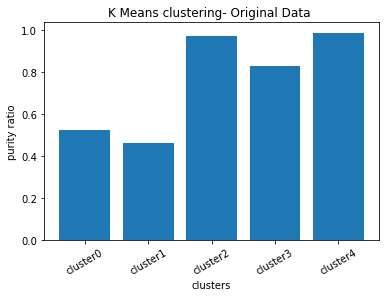

In [52]:
label = ['cluster0','cluster1','cluster2','cluster3','cluster4']
pur = pur_kmean
index = np.arange(len(label))
plt.bar(index, pur)
plt.xlabel('clusters', fontsize=10)
plt.ylabel('purity ratio', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('K Means clustering- Original Data ')
plt.show()

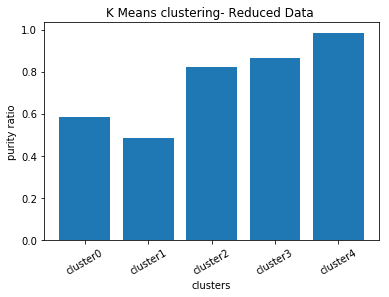

In [53]:
label = ['cluster0','cluster1','cluster2','cluster3','cluster4']
pur = pur_kmean1
index = np.arange(len(label))
plt.bar(index, pur)
plt.xlabel('clusters', fontsize=10)
plt.ylabel('purity ratio', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('K Means clustering- Reduced Data ')
plt.show()

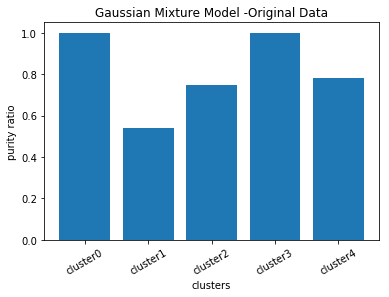

In [54]:
label = ['cluster0','cluster1','cluster2','cluster3','cluster4']
pur = pur_gmm
index = np.arange(len(label))
plt.bar(index, pur)
plt.xlabel('clusters', fontsize=10)
plt.ylabel('purity ratio', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Gaussian Mixture Model -Original Data')
plt.show()

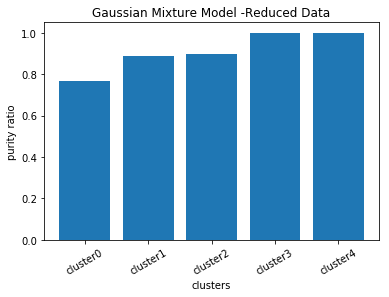

In [55]:
label = ['cluster0','cluster1','cluster2','cluster3','cluster4']
pur = pur_gmm1
index = np.arange(len(label))
plt.bar(index, pur)
plt.xlabel('clusters', fontsize=10)
plt.ylabel('purity ratio', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Gaussian Mixture Model -Reduced Data')
plt.show()

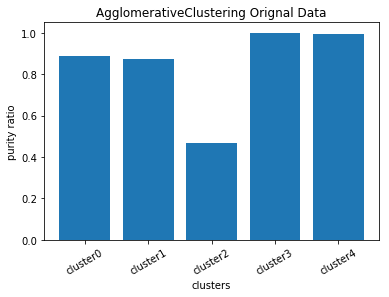

In [56]:
label = ['cluster0','cluster1','cluster2','cluster3','cluster4']
pur = pur_aglo
index = np.arange(len(label))
plt.bar(index, pur)
plt.xlabel('clusters', fontsize=10)
plt.ylabel('purity ratio', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('AgglomerativeClustering Orignal Data')
plt.show()

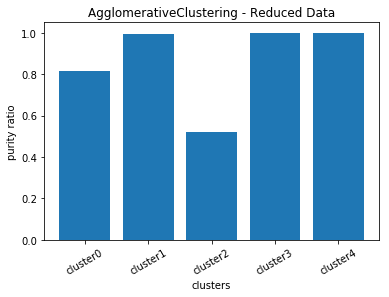

In [57]:
label = ['cluster0','cluster1','cluster2','cluster3','cluster4']
pur = pur_aglo1
index = np.arange(len(label))
plt.bar(index, pur)
plt.xlabel('clusters', fontsize=10)
plt.ylabel('purity ratio', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('AgglomerativeClustering - Reduced Data')
plt.show()

<h2>Average Cluster purity

<h4>K-Means::</h4><br>
Original Data :::: 0.86<br>
Reduced Data :::: 0.83 <br><br>
<h4>GMM::</h4><br>
Original Data :::: 0.79<br>
Reduced Data :::: 0.78 <br><br>
<h4>Aglomorative(Hierarchical)::</h4><br>
Original Data :::: 0.86<br>
Reduced Data :::: 0.83 <br>

We can see that reduced dimension didn't affect the purity by much. And reducing dimensions to half is a good tradeoff between computation speed and performance.